<a href="https://colab.research.google.com/github/pramudyadika/Stunting-Prediction/blob/main/Stunting_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STUNTING PREDICTION**

### **PROBLEM STATEMENT**

Stunting pada bayi merupakan masalah serius kesehatan publik yang membutuhkan pendekatan proaktif. Proyek ini bertujuan untuk menggunakan teknik Data Mining untuk mengidentifikasi faktor-faktor yang dapat mengklasifikasikan apakah seorang bayi akan mengalami stunting atau tidak setelah dilahirkan.

#### **Tujuan**
Mengeksplorasi dan menganalisis data terkait karakteristik bayi yang dapat memengaruhi stunting.

#### **Pemodelan Klasifikasi**
Mengimplementasikan algoritma Data Mining untuk membangun model klasifikasi yang dapat memprediksi kemungkinan stunting pada bayi.


Melalui proyek ini, diharapkan dapat ditemukan pola-pola yang berguna dalam mencegah dan mengurangi kasus stunting pada bayi, serta memberikan wawasan bagi pemangku kepentingan untuk meningkatkan upaya kesehatan masyarakat.

### **IMPORT LIBRARY DAN DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/stunting_dataset_merged.csv')

In [ ]:
df.head()

,Sex,Age,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,Female,56,2.9,50,11.0,90.0,Yes,No
1,Female,20,3.3,49,11.1,80.5,No,No
2,Male,4,2.8,48,6.5,63.0,No,No
3,Female,14,2.0,49,7.0,71.0,Yes,No
4,Male,32,3.2,49,11.0,88.7,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16500 entries, 0 to 16499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            16500 non-null  object 
 1   Age            16500 non-null  int64  
 2   Birth Weight   16500 non-null  float64
 3   Birth Length   16500 non-null  int64  
 4   Body Weight    16500 non-null  float64
 5   Body Length    16500 non-null  float64
 6   ASI Eksklusif  16500 non-null  object 
 7   Stunting       16500 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.0+ MB


### **DATA PREPROCESSING**

> Mengecek null values

In [ ]:
df.isna().sum()

Sex              0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
ASI Eksklusif    0
Stunting         0
dtype: int64

>Men-drop kolom yang tidak digunakan.

In [ ]:
# # Remove Columns
cols = ['Age']
df.drop(cols,axis = 1, inplace = True)

In [ ]:
df.head()

,Sex,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,Female,2.9,50,11.0,90.0,Yes,No
1,Female,3.3,49,11.1,80.5,No,No
2,Male,2.8,48,6.5,63.0,No,No
3,Female,2.0,49,7.0,71.0,Yes,No
4,Male,3.2,49,11.0,88.7,Yes,No


### **Melakukan LabelEncoder**

> Mengubah nilai-nilai dalam satu kolom kategori menjadi angka atau label numerik.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,Sex,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,0,2.9,50,11.0,90.0,Yes,No
1,0,3.3,49,11.1,80.5,No,No
2,1,2.8,48,6.5,63.0,No,No
3,0,2.0,49,7.0,71.0,Yes,No
4,1,3.2,49,11.0,88.7,Yes,No


In [ ]:
df['ASI Eksklusif'] = le.fit_transform(df['ASI Eksklusif'])
df['Stunting'] = le.fit_transform(df['Stunting'])

In [ ]:
df.head()

,Sex,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,0,2.9,50,11.0,90.0,1,0
1,0,3.3,49,11.1,80.5,0,0
2,1,2.8,48,6.5,63.0,0,0
3,0,2.0,49,7.0,71.0,1,0
4,1,3.2,49,11.0,88.7,1,0


### **TRAINING MODEL**

 > **RandomForestClassifier** adalah algoritma ensemble yang membangun beberapa pohon keputusan secara acak untuk meningkatkan prediksi.

>Algoritma ini dipilih untuk klasifikasi stunting karena kemampuannya menangani banyak fitur, ketergantungan fitur, dan mencegah overfitting, sambil memberikan interpretabilitas yang baik.

#### **Split Dataset**

In [ ]:
# Separate the features (X) and the target variable (y).
# X, y are variable names used mostly for fetaure and target variables
X = df.drop('Stunting', axis=1)
y = df['Stunting']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Mencari Parameter Terbaik Dengan GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Minimum number of samples required to be at a leaf node
}

# Create the grid search model
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model from the grid search
best_RFclassifier = grid_search.best_estimator_

# Train the best model on the training data
best_RFclassifier.fit(X_train, y_train)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [15]:
# Make predictions on the test set
y_pred = best_RFclassifier.predict(X_test)

#### **Mengevaluasi Model**

Menggunakan Akurasi, Recall, F1-Score, Support, serta Confusion Matrix

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1065
           1       0.89      0.97      0.93      2235

    accuracy                           0.90      3300
   macro avg       0.91      0.86      0.88      3300
weighted avg       0.90      0.90      0.90      3300



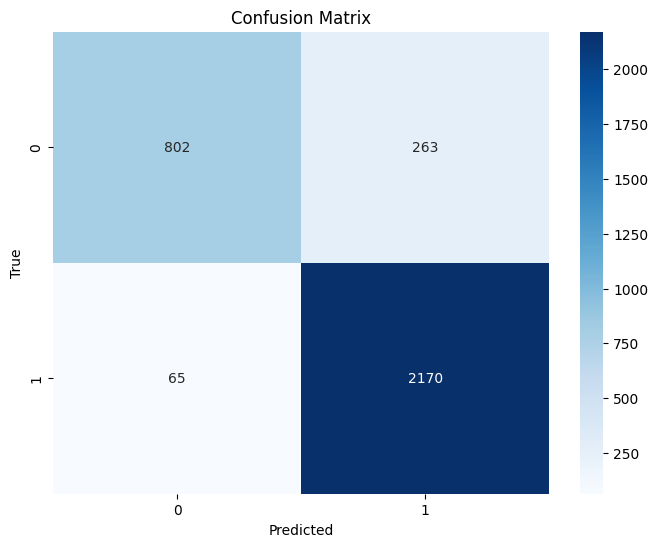

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the best_RFclassifier and made predictions (y_pred) as mentioned in the previous response

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_RFclassifier.classes_,
            yticklabels=best_RFclassifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


> Confusion matrix digunakan untuk mengevaluasi performa model klasifikasi. Didapatkan:
* True Positive (TP): 2170 anak yang benar-benar mengalami stunting dan diprediksi dengan benar.
* True Negative (TN): 798 anak yang benar-benar tidak mengalami stunting dan diprediksi dengan benar.
* False Positive (FP): 267 anak yang sebenarnya tidak mengalami stunting tetapi diprediksi mengalami stunting.
* False Negative (FN): 65 anak yang sebenarnya mengalami stunting tetapi diprediksi tidak mengalami stunting.

### **KESIMPULAN**

> Model klasifikasi stunting mencapai tingkat **akurasi sebesar 90%**, yang menunjukkan bahwa sebagian besar prediksi model benar.

> Kesimpulannya, model memiliki kinerja yang baik dalam mengidentifikasi anak-anak yang mengalami stunting, tetapi mungkin perlu diperbaiki untuk meningkatkan ketepatan identifikasi anak-anak yang tidak mengalami stunting. Evaluasi lebih lanjut dan penyesuaian model mungkin diperlukan untuk meningkatkan keseimbangan antara precision dan recall.